##### ML BootCamp tutorial
https://mlbootcamp.ru/ru/article/tutorial/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?')

In [3]:
data.shape

(690, 16)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [6]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [7]:
data['A5'][687]

'p'

In [8]:
data.at[687, 'A5']

'p'

In [9]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [11]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [12]:
data.describe(include=['object'])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [13]:
for c in categorical_columns:
    print(data[c].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


array([[<AxesSubplot:xlabel='A2', ylabel='A2'>,
        <AxesSubplot:xlabel='A3', ylabel='A2'>,
        <AxesSubplot:xlabel='A8', ylabel='A2'>,
        <AxesSubplot:xlabel='A11', ylabel='A2'>,
        <AxesSubplot:xlabel='A14', ylabel='A2'>,
        <AxesSubplot:xlabel='A15', ylabel='A2'>],
       [<AxesSubplot:xlabel='A2', ylabel='A3'>,
        <AxesSubplot:xlabel='A3', ylabel='A3'>,
        <AxesSubplot:xlabel='A8', ylabel='A3'>,
        <AxesSubplot:xlabel='A11', ylabel='A3'>,
        <AxesSubplot:xlabel='A14', ylabel='A3'>,
        <AxesSubplot:xlabel='A15', ylabel='A3'>],
       [<AxesSubplot:xlabel='A2', ylabel='A8'>,
        <AxesSubplot:xlabel='A3', ylabel='A8'>,
        <AxesSubplot:xlabel='A8', ylabel='A8'>,
        <AxesSubplot:xlabel='A11', ylabel='A8'>,
        <AxesSubplot:xlabel='A14', ylabel='A8'>,
        <AxesSubplot:xlabel='A15', ylabel='A8'>],
       [<AxesSubplot:xlabel='A2', ylabel='A11'>,
        <AxesSubplot:xlabel='A3', ylabel='A11'>,
        <AxesSubplot:xlabe

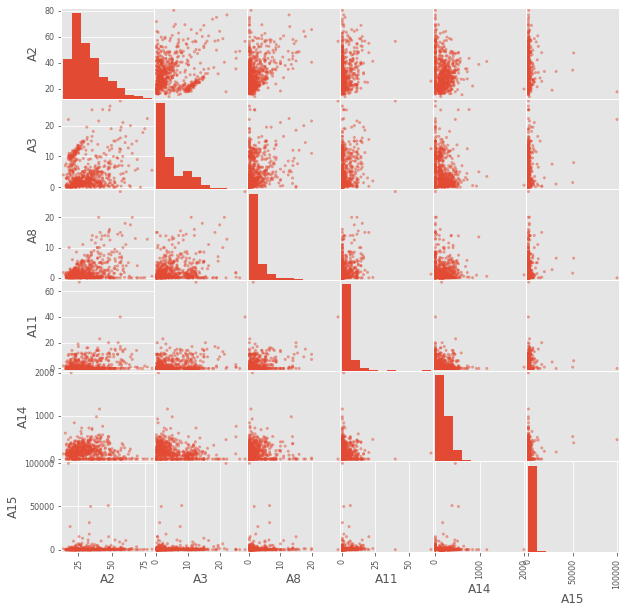

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.5, figsize=(10, 10))

In [15]:
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


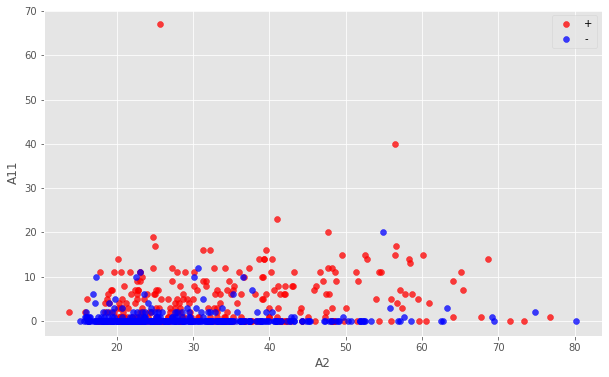

In [16]:
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best')

In [17]:
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

In [18]:
data = data.fillna(data.median(axis=0, numeric_only=True), axis=0)

In [19]:
data.count(axis=0)

A1       678
A2       690
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      690
A15      690
class    690
dtype: int64

In [20]:
data['A1'].describe()

count     678
unique      2
top         b
freq      468
Name: A1, dtype: object

In [21]:
data['A1'] = data['A1'].fillna('b')

In [22]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [23]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [24]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [26]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [27]:
data.at[data['A1'] == 'b', 'A1'] = 0
data.at[data['A1'] == 'a', 'A1'] = 1
data['A1'].describe()

count     690
unique      2
top         0
freq      480
Name: A1, dtype: int64

In [28]:
data_describe = data.describe(include=[object])
data_describe

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,0,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [29]:
for c in binary_columns[1:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [30]:
data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383


In [31]:
data['A4'].unique()

array(['u', 'y', 'l'], dtype=object)

In [32]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [33]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,2.059544e-16,1.029772e-17,1.029772e-16,1.029772e-17,4.891417e-17,1.029772e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


In [34]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print(data.columns)

(690, 43)
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')


In [35]:
X = data.drop(('class'), axis=1)
y = data['class']
feature_names = X.columns
print(feature_names)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [36]:
print(X.shape)
print(y.shape)
N, d = X.shape

(690, 42)
(690,)


In [37]:
N

690

In [38]:
d

42

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

483 207


In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.14699792960662525 0.16908212560386474


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature name

0.19465206185567008 5


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature name

In [53]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.14699792960662525 0.16908212560386474


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.10766045548654245 0.12560386473429952


In [57]:
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.14289089347079043
best C      =  10.0
best gamma  =  0.001


In [58]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.14492753623188406 0.11594202898550725


In [59]:
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)

CV error    =  0.15118127147766314
best C      =  0.1


In [60]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.15113871635610765 0.12560386473429952


In [61]:
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)
print('best degree = ', grid.best_estimator_.degree)

CV error    =  0.14289089347079043
best C      =  0.0001
best gamma  =  10.0
best degree =  2


In [62]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.09730848861283643 0.12077294685990338


In [64]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.10144927536231885


In [66]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print('Feature importances:')
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'A9   ' (0.2269)
 2. feature 'A8   ' (0.1020)
 3. feature 'A11  ' (0.0816)
 4. feature 'A15  ' (0.0813)
 5. feature 'A3   ' (0.0791)
 6. feature 'A14  ' (0.0730)
 7. feature 'A2   ' (0.0672)
 8. feature 'A10  ' (0.0649)
 9. feature 'A6_x ' (0.0155)
10. feature 'A7_h ' (0.0141)
11. feature 'A12  ' (0.0139)
12. feature 'A1   ' (0.0133)
13. feature 'A7_v ' (0.0122)
14. feature 'A6_q ' (0.0116)
15. feature 'A6_k ' (0.0110)
16. feature 'A5_p ' (0.0104)
17. feature 'A13_g' (0.0100)
18. feature 'A6_w ' (0.0099)
19. feature 'A6_ff' (0.0093)
20. feature 'A5_g ' (0.0087)
21. feature 'A6_c ' (0.0079)
22. feature 'A4_u ' (0.0075)
23. feature 'A4_y ' (0.0071)
24. feature 'A7_bb' (0.0071)
25. feature 'A13_s' (0.0070)
26. feature 'A6_cc' (0.0067)
27. feature 'A6_i ' (0.0059)
28. feature 'A7_ff' (0.0058)
29. feature 'A6_aa' (0.0047)
30. feature 'A6_m ' (0.0037)
31. feature 'A6_e ' (0.0035)
32. feature 'A13_p' (0.0035)
33. feature 'A6_d ' (0.0031)
34. feature 'A7_j ' (0

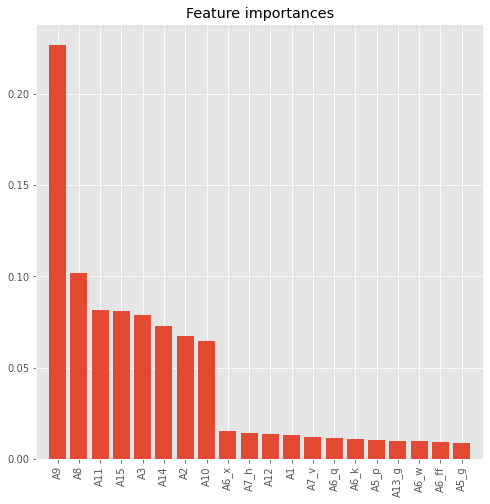

In [67]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title('Feature importances')
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [69]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['A9', 'A8', 'A11', 'A15', 'A3', 'A14', 'A2', 'A10'], dtype='object')


In [71]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print(err_train, err_test)

0.024844720496894408 0.10144927536231885


In [72]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print(err_train, err_test)

0.035196687370600416 0.10628019323671498
